<font face='arial' color='navy' size=12pt>Project 2 - Hassan Koroma (DATA 310 - Applied Machine Learning)</font>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import beta, norm, uniform, triang, gamma
import matplotlib.pyplot as plt
import seaborn as sns

<font color='blue' size=6pt>Question 1: Population Mean Trapped in CI</font>

- Write code for creating 200 simple random samples of size 30 from a population of size 1000000 that follows a beta distribution with loc=3, scale =4, 𝛼=1.5  and  𝛽=2.3 . If you consider a 96% confidence level, create the corresponding 200 confidence intervals and check with code how many trap inside the mean of the population. Hint: you can approximate the mean and the standard deviation of the population.

In [3]:
def MeanTrapped(N=1000000, n=30, srs=200):
    # population from beta distribution
    X = beta.rvs(loc=3, scale=4, size=N, a=1.5, b=2.3)
    pop_mean = np.mean(X)
    pop_std = np.std(X)

    # computing sample means from 200 simple random samples of size 30
    sample_means = [np.mean(np.random.choice(X, size=n, replace=False)) for i in range(srs)]

    # computing zscore for 96% CI; both tails = 2 pct or 0.02
    z_a2 = np.abs(norm.ppf(q=0.02))

    # computing error
    d = z_a2*(pop_std/np.sqrt(n))

    # computing the number of times the population mean is trapped inside the a 96% CI
    result = np.abs(sample_means - pop_mean) < d
    pct_trapped = sum(result)/srs

    return f'Answer: {pct_trapped} or {round(pct_trapped*100)}%'

In [4]:
MeanTrapped()

'Answer: 0.965 or 96%'

---
<font color='blue' size=6pt>Question 2: Two Most Lucky Machines</font>
 - Create a mini-casino with 5 slot machines such that the rewards are distributed as follows:

      - Machine_1: Normal distribution with mean 0.2 and standard deviation 1.1
      - Machine_2: Uniform distribution supported between 1 and 2.5.
      - Machine_3 Triangular distribution supported between 0.5 and 2, and the vertex projection splits the base 70%-30%.
      - Machine_4 Gamma distribution supported between -0.25 and infinity, with 𝛽 = 2/3, and 𝛼=2
      - Machine_5 Beta distribution supported between 0 and 2.5, with 𝛼=2.5, and 𝛽 = 2.3
      - Assume it costs $2 to play each machine once. 
      - Write code and apply the reinforcement learning method studied to determine the two most lucky machines.

In [5]:
def Casino(machine):
    if (machine == 1):
        return round(norm.rvs(loc=0.2, scale=1.1),2)
    if (machine == 2):
        return round(uniform.rvs(loc=1, scale=2.5),2)
    if (machine == 3):
        return round(triang.rvs(loc=0.5,scale=2,c=0.7),2)
    if (machine == 4):
        return round(gamma.rvs(loc=-0.25, scale=3/2, a=2),2)
    if (machine == 5):
        return round(beta.rvs(loc=0, scale=2.5, a=2.5, b=2.3),2)
    else:
        print('There are only 5 slot machines!')

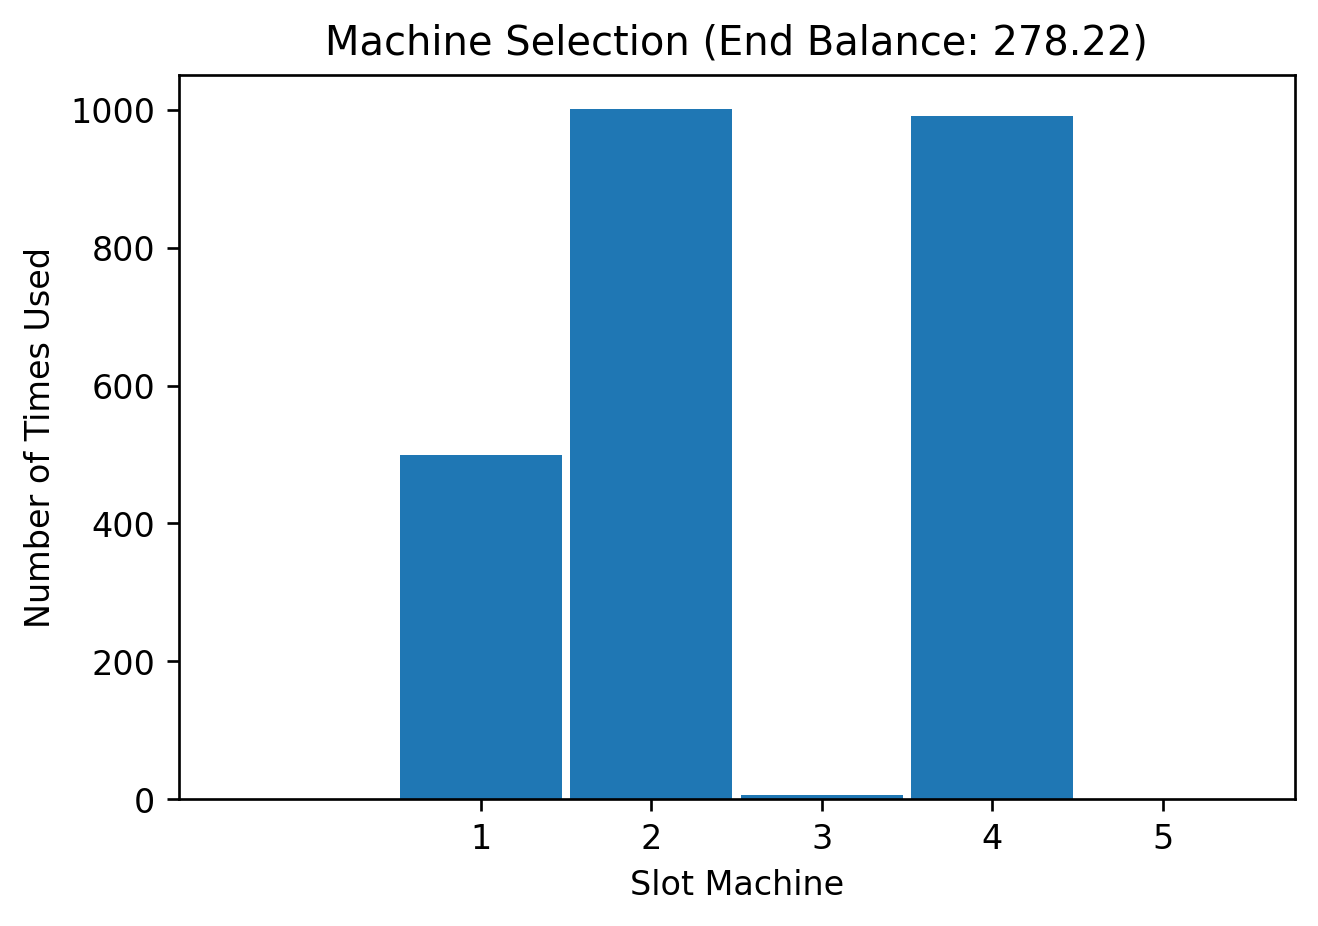

Two most lucky machines: 2 and 4


In [6]:
# UCB algorithm
N = 500 # number of times we play
d = 5 # total machines
machine_record = []
award_record = []
balance = 200

c = 0.9
number_of_selections = [0] * d
sum_of_rewards = [0] * d



for n in range(N): # here we start playing
    machine_choice = 1
    max_upper_bound = 0
    for i in range(d):
        if (number_of_selections[i] > 0):
            average_reward = sum_of_rewards[i]/number_of_selections[i]
            E = c*np.sqrt(np.log(n)/number_of_selections[i])
            upper_bound = average_reward + E
        else:
            upper_bound = 1e200


        if(upper_bound >= max_upper_bound):
            max_upper_bound = upper_bound
            machine_choice = i+1 

        machine_record.append(machine_choice) # keeping track of the machines played
        number_of_selections[machine_choice-1] = number_of_selections[machine_choice-1] + 1 # keeping track of how many times we played each machine
        award = Casino(machine=machine_choice) # the oputput of the machine played
        sum_of_rewards[machine_choice-1] = sum_of_rewards[machine_choice-1] + award # keeping track of the rewards from each machine
        balance = balance - 2 + award # keeping track of the balance in the wallet

plt.hist(machine_record, bins=range(7), rwidth=0.95, align='left')
plt.title("Machine Selection (End Balance: " + str(round(balance,2)) + ")")
plt.xlabel("Slot Machine")
plt.xticks(np.arange(1,6,1))
plt.ylabel("Number of Times Used")
plt.show()
print(f'Two most lucky machines: 2 and 4')

---
<font color='blue' size=6pt>Question 3: Association Rules</font>

3. Consider the data Groceries.csv. Apply the "apriori" alorithm to determine what are the rules betweeen two items that have a minimum support of 0.005, a minimum confidence of 0.01, and a lift of at least 3.0.

In [7]:
# !pip install apyori

In [8]:
from apyori import apriori 

In [9]:
data = pd.read_csv('data/Groceries.csv')
data.head(3)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit


In [10]:
# pivot by date to get daily purchases
pd.options.mode.chained_assignment = None
data['cols'] = data.groupby('Date').cumcount()
selected_pivot = data.pivot(index = 'Date',columns = 'cols')[['itemDescription']]

In [11]:
selected_pivot.head(3)

itemDescription                                            \
cols                      0             1               2           3    
Date                                                                     
01-01-2014           cleaner       sausage  tropical fruit  whole milk   
01-01-2015       canned beer  frozen meals          butter         ham   
01-02-2014  other vegetables     pip fruit     frankfurter       sugar   

                                                                               \
cols                      4                  5                 6           7    
Date                                                                            
01-01-2014      citrus fruit             onions  other vegetables     berries   
01-01-2015      citrus fruit     tropical fruit           dessert  whole milk   
01-02-2014  other vegetables  frozen vegetables              beef     waffles   

                                            ...                                \
cols                    8               9   ...   86   87   88   89   90   91   
Date                                        ...                                 
01-01-2014  hamburger meat  hamburger meat  ...  NaN  NaN  NaN  NaN  NaN  NaN   
01-01-2015  tropical fruit     frankfurter  ...  NaN  NaN  NaN  NaN  NaN  NaN   
01-02-2014            beef            meat  ...  NaN  NaN  NaN  NaN  NaN  NaN   

                                
cols         92   93   94   95  
Date                            
01-01-2014  NaN  NaN  NaN  NaN  
01-01-2015  NaN  NaN  NaN  NaN  
01-02-2014  NaN  NaN  NaN  NaN  

[3 rows x 96 columns]

In [12]:
# getting the list of daily purchased items
purchases = []
for i in range(0,len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,96)])

In [13]:
# purchases[0]

In [14]:
# running apriori algorithm
rules = apriori(purchases, min_support = 0.005, min_confidence = 0.01, min_lift=3, max_length=2)

In [15]:
results = list(rules)

In [16]:
# results

In [17]:
# rules built
rules = 0
for i in range(0,len(results)): 
    result = results[i]
    supp   = int(result.support*10000)/100
    conf   = int(result.ordered_statistics[0].confidence*100)
    hypo   = ''.join([x+' ' for x in result.ordered_statistics[0].items_base])
    conc   = ''.join([x+' ' for x in result.ordered_statistics[0].items_add if x!='nan'])
    if "nan" not in hypo:
        rules = rules + 1
        print("If "+str(hypo)+" is purchased, " +str(conf)+" % of the time " + str(conc)+" is purchased [support - " +str(supp)+"%]")
print("Total rules built : " +str(rules))

If abrasive cleaner  is purchased, 18 % of the time cleaner  is purchased [support - 0.54%]
If baking powder  is purchased, 5 % of the time decalcifier  is purchased [support - 0.82%]
If canned fruit  is purchased, 19 % of the time sauces  is purchased [support - 0.54%]
If cereals  is purchased, 9 % of the time cookware  is purchased [support - 0.54%]
If cleaner  is purchased, 13 % of the time rum  is purchased [support - 0.54%]
If cocoa drinks  is purchased, 31 % of the time finished products  is purchased [support - 0.68%]
If curd cheese  is purchased, 11 % of the time light bulbs  is purchased [support - 0.68%]
If decalcifier  is purchased, 44 % of the time pet care  is purchased [support - 0.54%]
If female sanitary products  is purchased, 10 % of the time honey  is purchased [support - 0.54%]
If female sanitary products  is purchased, 12 % of the time prosecco  is purchased [support - 0.68%]
If female sanitary products  is purchased, 17 % of the time softener  is purchased [support

In [18]:
# rules with their associated metrics
for item in results:
    pair = item[0]
    if "nan" not in pair:
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

        print("Support: " + str(round(item[1]*100,2)) + "%")


        print("Confidence: " + str(round( item[2][0][2]*100,2)) + "%")
        print("Lift: " + str( round(item[2][0][3],2) )+'\n')

Rule: abrasive cleaner -> cleaner
Support: 0.55%
Confidence: 18.18%
Lift: 4.56

Rule: baking powder -> decalcifier
Support: 0.82%
Confidence: 5.45%
Lift: 4.41

Rule: canned fruit -> sauces
Support: 0.55%
Confidence: 19.05%
Lift: 3.22

Rule: cereals -> cookware
Support: 0.55%
Confidence: 9.52%
Lift: 4.08

Rule: rum -> cleaner
Support: 0.55%
Confidence: 13.79%
Lift: 3.35

Rule: cocoa drinks -> finished products
Support: 0.69%
Confidence: 31.25%
Lift: 3.99

Rule: curd cheese -> light bulbs
Support: 0.69%
Confidence: 11.63%
Lift: 3.02

Rule: pet care -> decalcifier
Support: 0.55%
Confidence: 44.44%
Lift: 3.99

Rule: honey -> female sanitary products
Support: 0.55%
Confidence: 10.0%
Lift: 5.6

Rule: prosecco -> female sanitary products
Support: 0.69%
Confidence: 12.5%
Lift: 4.79

Rule: softener -> female sanitary products
Support: 0.96%
Confidence: 17.5%
Lift: 3.11

Rule: specialty fat -> female sanitary products
Support: 0.69%
Confidence: 12.5%
Lift: 3.14

Rule: flower (seeds) -> honey
Sup